In [1]:
from pymongo import MongoClient
import pandas as pd

In [2]:
mongo_client = MongoClient('localhost', 27017)
mongo_db = mongo_client['inatel']
mongo_collection = mongo_db['in242']

In [13]:
dados = list(mongo_collection.find())

In [14]:
df = pd.DataFrame(dados)

In [15]:
df.count()

_id            6898
temperatura    6898
data_coleta    6898
dtype: int64

In [7]:
df['temperatura'].mean()

24.006290928102207

In [8]:
df['temperatura'].max()

24.998748242746895

In [10]:
df['temperatura'].min()

23.0004654678107

In [12]:
df = df.drop(columns=['_id'])

In [77]:
def check_temperatura(temperatura):
    if temperatura < 21:
        return 'Frio'
    if temperatura < 26:
        return 'Normal'
    return 'Quente'

In [78]:
check_temperatura(32.5)

'Quente'

In [79]:
df['sensacao'] = df['temperatura'].apply(check_temperatura)

In [80]:
df.tail()

,data_coleta,temperatura,sensacao
1015,2019-10-05 13:08:56.034,24.387270,Normal
1016,2019-10-05 13:09:01.040,24.821564,Normal
1017,2019-10-05 13:09:06.046,24.187179,Normal
1018,2019-10-05 13:09:11.052,23.273702,Normal
1019,2019-10-05 13:09:16.059,23.597741,Normal


In [81]:
df.groupby(['sensacao']).count()

,data_coleta,temperatura
sensacao,,
Normal,1020,1020


In [82]:
df.groupby(['sensacao'])['temperatura'].mean()

sensacao
Normal    24.006291
Name: temperatura, dtype: float64

In [83]:
df.reset_index(inplace=True)

In [84]:
media_min = df.set_index('data_coleta').resample('min')['temperatura'].mean()

In [85]:
#df.set_index('data_coleta', inplace = True)

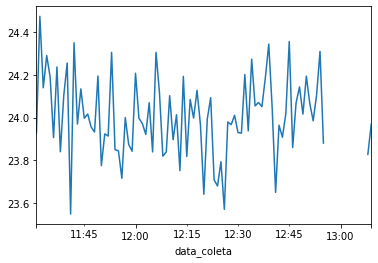

In [86]:
media_min.plot()

In [75]:
! pip install matplotlib

     |████████████████████████████████| 13.1MB 235kB/s eta 0:00:01    |█▌                              | 593kB 219kB/s eta 0:00:58     |████▍                           | 1.8MB 269kB/s eta 0:00:43     |████▋                           | 1.9MB 269kB/s eta 0:00:42     |████▉                           | 2.0MB 269kB/s eta 0:00:42     |█████▏                          | 2.1MB 324kB/s eta 0:00:35     |█████▎                          | 2.2MB 324kB/s eta 0:00:34     |███████                         | 2.8MB 490kB/s eta 0:00:21     |████████████▍                   | 5.1MB 292kB/s eta 0:00:28     |█████████████▉                  | 5.7MB 349kB/s eta 0:00:22     |███████████████▍                | 6.3MB 428kB/s eta 0:00:16     |████████████████▏               | 6.6MB 291kB/s eta 0:00:23     |████████████████▋               | 6.8MB 387kB/s eta 0:00:17     |█████████████████▍              | 7.1MB 387kB/s eta 0:00:16     |██████████████████▋             | 7.7MB 341kB/s eta 0:00:17     |███████████████████

In [90]:
df.set_index('data_coleta').resample('min').mean().reset_index().sort_values('temperatura')

,data_coleta,index,temperatura
10,2019-10-05 11:41:00,122.5,23.547723
55,2019-10-05 12:26:00,661.5,23.569766
49,2019-10-05 12:20:00,589.5,23.640475
70,2019-10-05 12:41:00,841.5,23.649496
53,2019-10-05 12:24:00,637.5,23.679111
...,...,...,...
92,2019-10-05 13:03:00,NaN,NaN
93,2019-10-05 13:04:00,NaN,NaN
94,2019-10-05 13:05:00,NaN,NaN
95,2019-10-05 13:06:00,NaN,NaN


In [91]:
df['alerta']=df['temperatura'].apply(lambda x: True if x >= 28 else False)

In [92]:
df

,index,data_coleta,temperatura,sensacao,alerta
0,0,2019-10-05 11:31:18.249,23.680465,Normal,False
1,1,2019-10-05 11:31:23.258,23.764262,Normal,False
2,2,2019-10-05 11:31:28.266,24.508345,Normal,False
3,3,2019-10-05 11:31:33.271,23.044680,Normal,False
4,4,2019-10-05 11:31:38.280,24.341947,Normal,False
...,...,...,...,...,...
1015,1015,2019-10-05 13:08:56.034,24.387270,Normal,False
1016,1016,2019-10-05 13:09:01.040,24.821564,Normal,False
1017,1017,2019-10-05 13:09:06.046,24.187179,Normal,False
1018,1018,2019-10-05 13:09:11.052,23.273702,Normal,False


In [102]:
df.tail()

,index,data_coleta,temperatura,sensacao,alerta
1015,1015,2019-10-05 13:08:56.034,24.387270,Normal,False
1016,1016,2019-10-05 13:09:01.040,24.821564,Normal,False
1017,1017,2019-10-05 13:09:06.046,24.187179,Normal,False
1018,1018,2019-10-05 13:09:11.052,23.273702,Normal,False
1019,1019,2019-10-05 13:09:16.059,23.597741,Normal,False


In [106]:
df[df['alerta']== True]

,index,data_coleta,temperatura,sensacao,alerta


In [107]:
q1=df.set_index('data_coleta').resample('min').mean()

In [108]:
q1.loc[q1.idxmax()['temperatura']]

index          14.500000
temperatura    24.475843
alerta          0.000000
Name: 2019-10-05 11:32:00, dtype: float64

In [109]:
df_hora = df.set_index('data_coleta').resample('H')

In [119]:
df2 = pd.DataFrame()

In [120]:
df2['media'] = df.set_index('data_coleta').resample('H')['temperatura'].mean()

In [121]:
df2

,media
data_coleta,
2019-10-05 11:00:00,24.018023
2019-10-05 12:00:00,24.002059
2019-10-05 13:00:00,23.884592


In [123]:
df2['maximo'] = df.set_index('data_coleta').resample('H')['temperatura'].max()

In [124]:
df2

,media,maximo
data_coleta,,
2019-10-05 11:00:00,24.018023,24.994017
2019-10-05 12:00:00,24.002059,24.998748
2019-10-05 13:00:00,23.884592,24.821564


In [125]:
df2['minimo'] = df.set_index('data_coleta').resample('H')['temperatura'].min()

In [126]:
df2


,media,maximo,minimo
data_coleta,,,
2019-10-05 11:00:00,24.018023,24.994017,23.006362
2019-10-05 12:00:00,24.002059,24.998748,23.000465
2019-10-05 13:00:00,23.884592,24.821564,23.008471
